In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('train.csv').drop(['id'],axis=1)
data

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55.0,170.0,80.0,92.0,1.2,0.8,1.0,1.0,129.0,74.0,82.0,175.0,58.0,49.0,114.0,15.4,1.0,0.9,20.0,23.0,13.0,0.0,0.0
1,30.0,170.0,80.0,94.0,1.5,1.5,1.0,1.0,128.0,84.0,95.0,188.0,128.0,51.0,111.0,16.2,1.0,0.9,30.0,39.0,92.0,0.0,1.0
2,45.0,170.0,75.0,84.0,1.0,1.0,1.0,1.0,124.0,80.0,98.0,192.0,138.0,52.0,112.0,14.6,2.0,0.9,20.0,20.0,50.0,0.0,1.0
3,55.0,150.0,55.0,85.0,0.9,0.5,1.0,1.0,123.0,79.0,95.0,193.0,65.0,61.0,119.0,13.4,1.0,0.8,25.0,20.0,18.0,0.0,0.0
4,45.0,160.0,55.0,72.0,0.5,0.6,1.0,1.0,117.0,76.0,103.0,197.0,81.0,61.0,120.0,13.9,1.0,0.7,20.0,26.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,40.0,170.0,70.0,81.0,1.0,1.0,1.0,1.0,130.0,79.0,91.0,181.0,133.0,47.0,106.0,15.8,1.0,0.9,19.0,20.0,25.0,1.0,1.0
14996,40.0,155.0,50.0,75.0,1.0,1.2,1.0,1.0,100.0,60.0,83.0,169.0,59.0,51.0,106.0,14.1,1.0,0.8,22.0,17.0,20.0,0.0,0.0
14997,45.0,160.0,55.0,81.0,1.2,0.8,1.0,1.0,100.0,60.0,91.0,150.0,68.0,39.0,97.0,16.2,1.0,0.9,25.0,20.0,30.0,0.0,0.0
14998,50.0,160.0,60.0,80.0,0.7,1.0,1.0,1.0,120.0,80.0,90.0,258.0,97.0,88.0,151.0,14.5,1.0,0.9,19.0,13.0,11.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   height(cm)           15000 non-null  float64
 2   weight(kg)           15000 non-null  float64
 3   waist(cm)            15000 non-null  float64
 4   eyesight(left)       15000 non-null  float64
 5   eyesight(right)      15000 non-null  float64
 6   hearing(left)        15000 non-null  float64
 7   hearing(right)       15000 non-null  float64
 8   systolic             15000 non-null  float64
 9   relaxation           15000 non-null  float64
 10  fasting blood sugar  15000 non-null  float64
 11  Cholesterol          15000 non-null  float64
 12  triglyceride         15000 non-null  float64
 13  HDL                  15000 non-null  float64
 14  LDL                  15000 non-null  float64
 15  hemoglobin           15000 non-null 

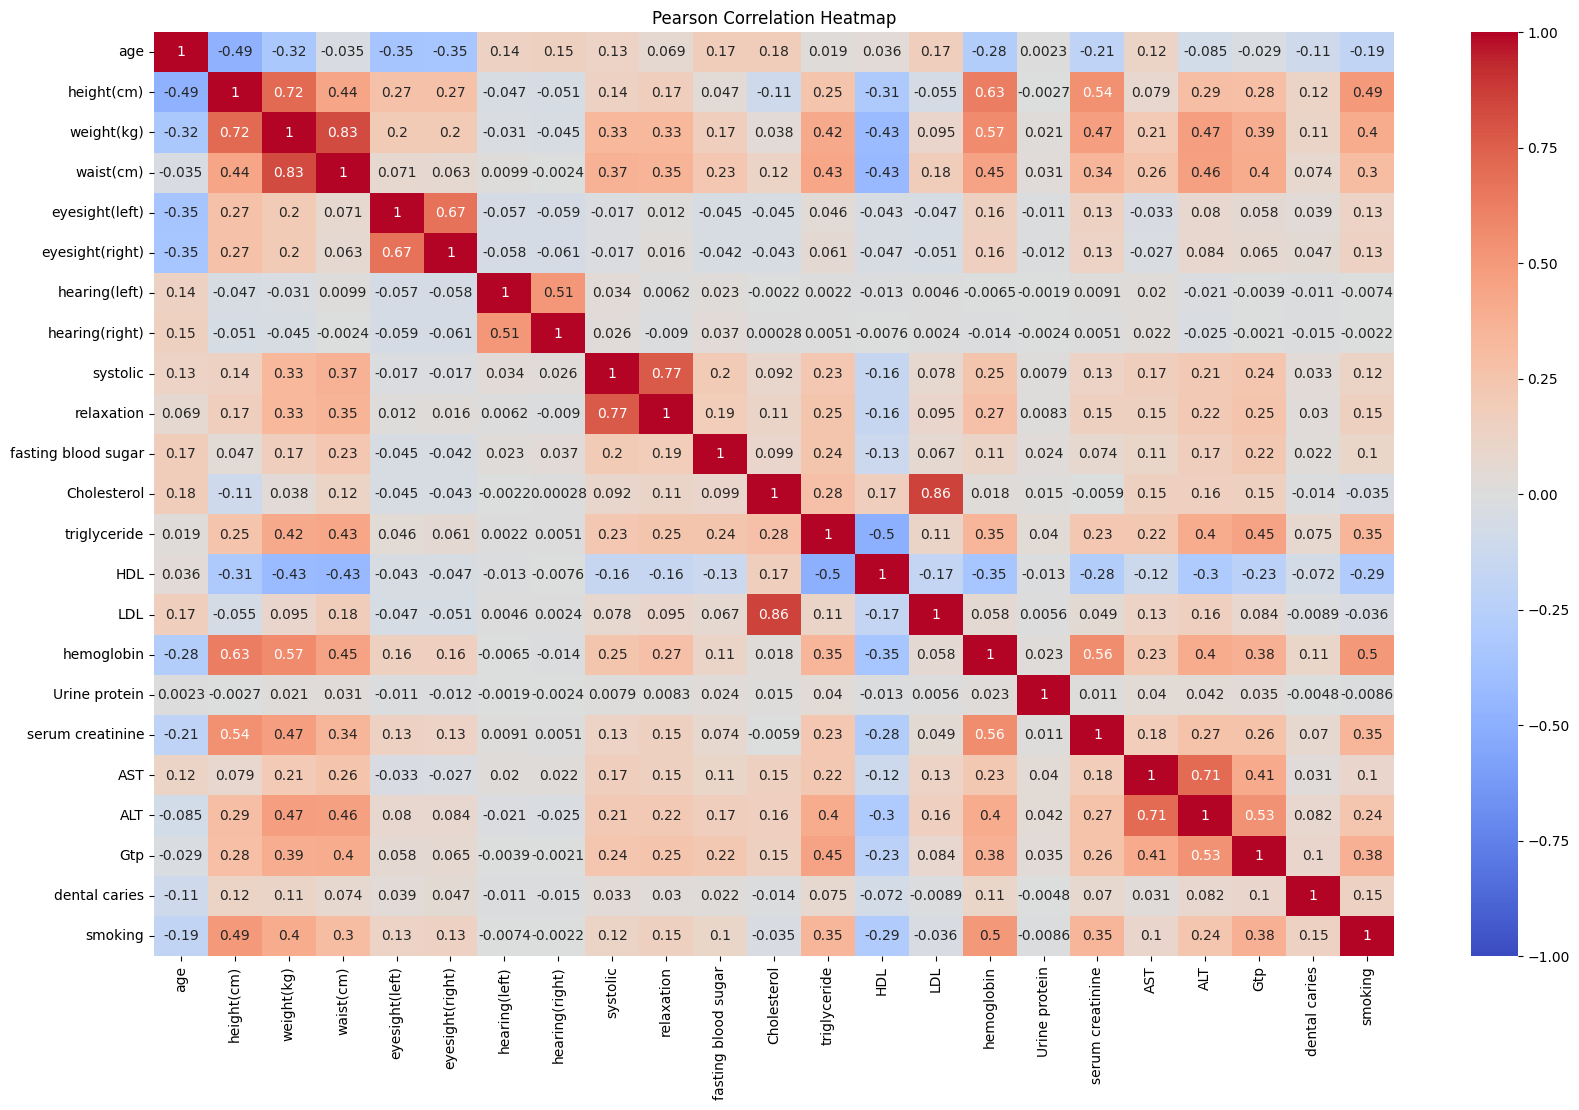

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmaplar uchun sozlamalar
plt.figure(figsize=(20, 12))  
# Pearson korrelyatsiyasi heatmap
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=False)
plt.title("Pearson Correlation Heatmap")
plt.show()


Text(0.5, 1.0, 'Spearman Correlation Heatmap')

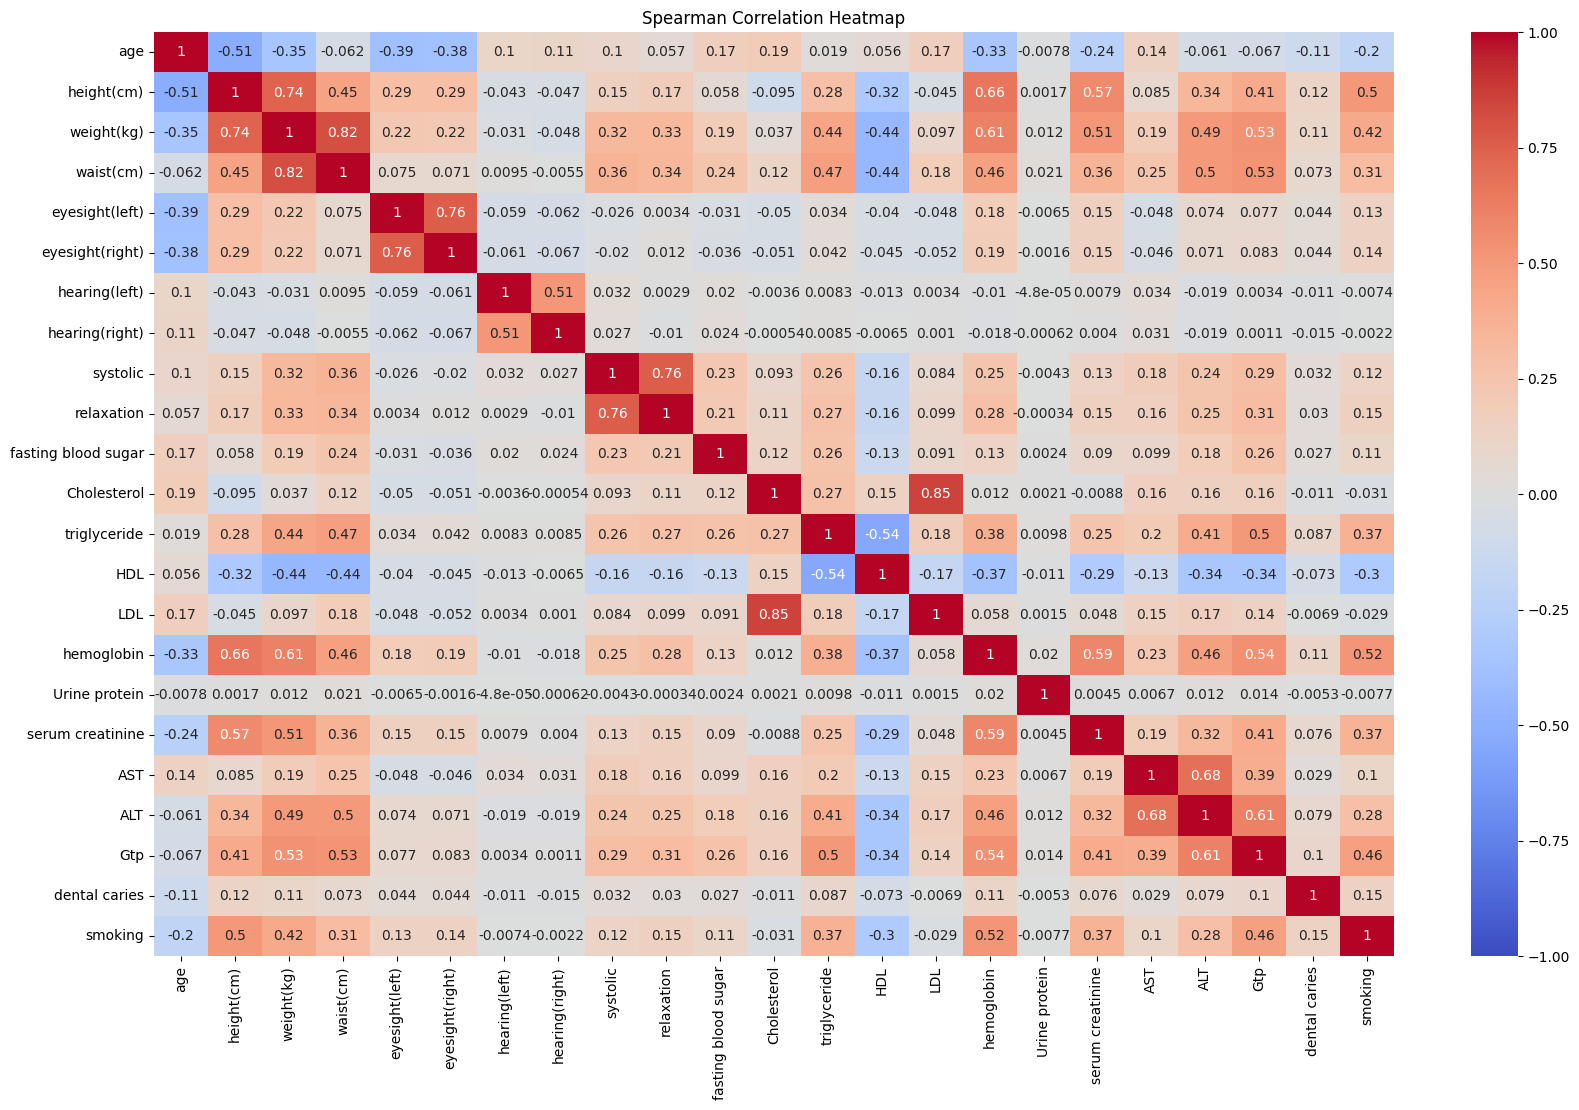

In [5]:

plt.figure(figsize=(20, 12))  
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman Correlation Heatmap")


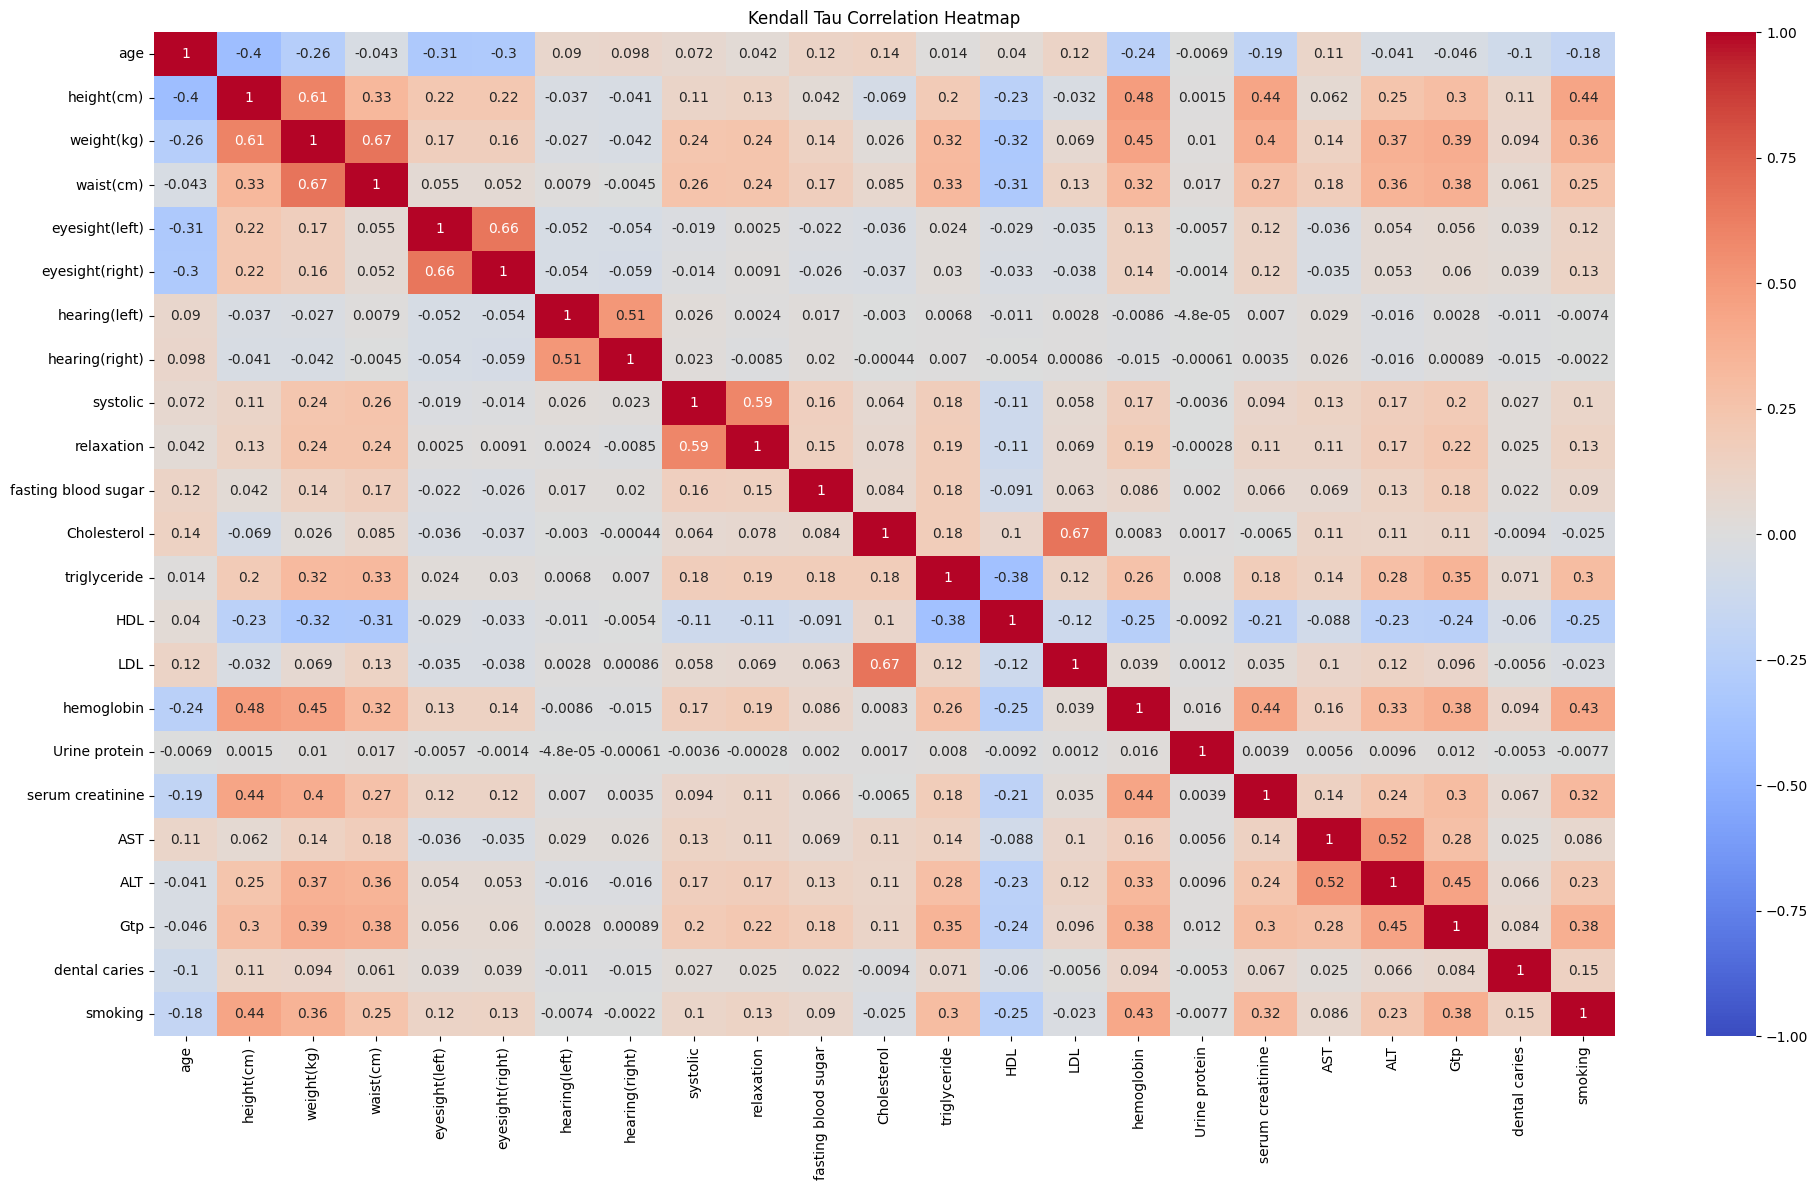

In [6]:

# Kendall Tau korrelyatsiyasi heatmap
plt.figure(figsize=(20, 12))  
sns.heatmap(data.corr(method='kendall'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Kendall Tau Correlation Heatmap")

plt.tight_layout()
plt.show()


In [12]:

# Feature Engineering: yangi ustunlar yaratish
data['BMI'] = data['weight(kg)'] / (data['height(cm)'] / 100) ** 2  # BMI
data['Height_to_Waist_Ratio'] = data['height(cm)'] / data['waist(cm)']  # Bo'y va bel nisbat
data['Weight_to_Waist_Ratio'] = data['weight(kg)'] / data['waist(cm)']  # Vazn va bel nisbat
data['Eyesight_Difference'] = abs(data['eyesight(left)'] - data['eyesight(right)'])  # Ko'rish farqi
data['Hearing_Difference'] = abs(data['hearing(left)'] - data['hearing(right)'])  # Eshitish farqi
data['Blood_Pressure_Difference'] = abs(data['systolic'] - data['waist(cm)'])  # Qon bosimi farqi
data['Total_Cholesterol'] = data['HDL'] + data['LDL']  # Umumiy xolesterin
data['Hemoglobin_Serum_Ratio'] = data['hemoglobin'] / data['serum creatinine']  # Gemoglobin va zardob nisbati
data['ALT_AST_Ratio'] = data['ALT'] / data['AST']  # Jigar fermentlari nisbati
data['GTP_ALT_Ratio'] = data['Gtp'] / data['ALT']  # Gtp va ALT fermentlari nisbati
data['log_weight'] = np.log1p(data['weight(kg)'])  # Vaznning logaritmasi
data['interaction_1'] = data['height(cm)'] * data['BMI']  # O'zaro ta'sir xususiyati
X = data.drop(columns=['smoking'])
y = data['smoking']
# Ma'lumotlarni o'qitish va test uchun ajratamiz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)


C:\Users\user\AppData\Local\Temp\ipykernel_6644\2344319305.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


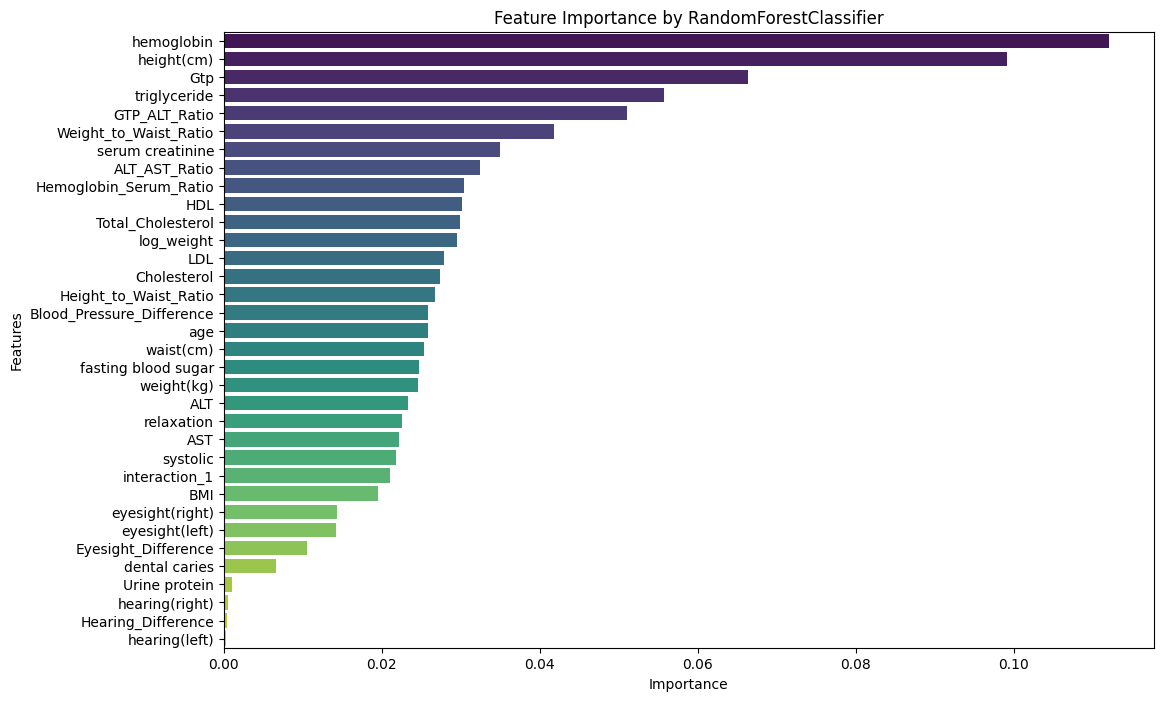

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier modelini o'rgatish
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)

# Xususiyatlarning muhimligini olish
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Muhimlik bo'yicha tartiblashtirish
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Histplot yordamida chizish
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance by RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6644\1469262884.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F_Value', y='Feature', data=feature_importance, palette='viridis')


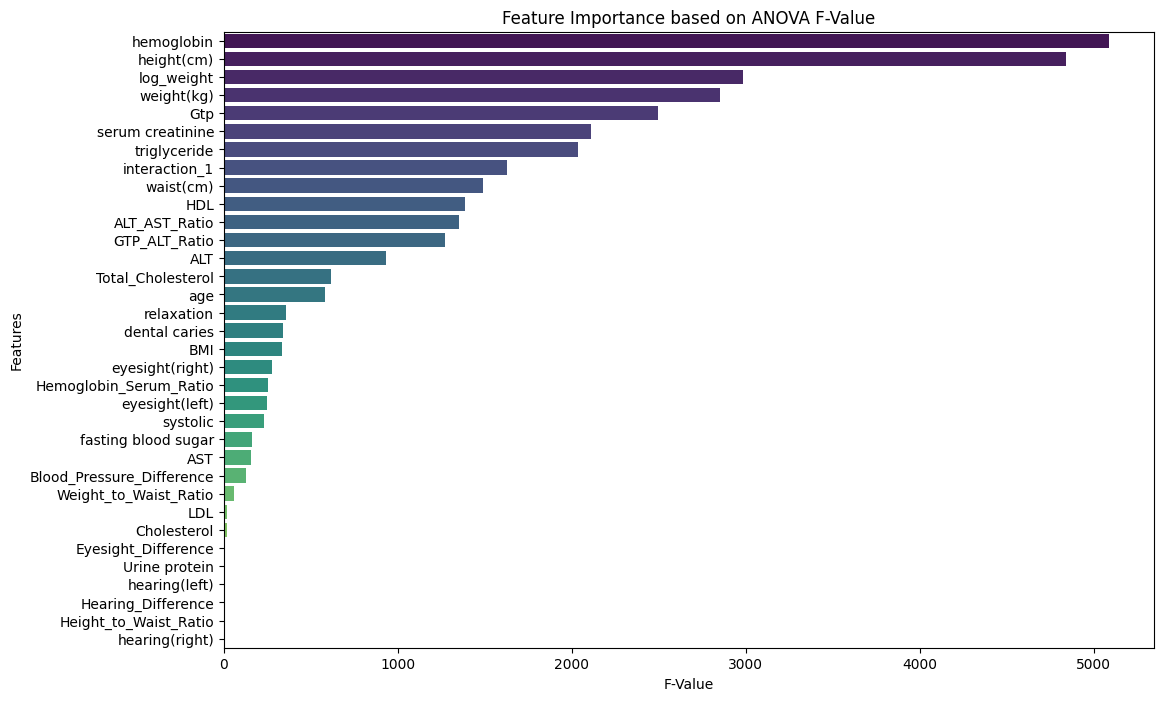

In [16]:
from sklearn.feature_selection import f_classif
import pandas as pd

# ANOVA tahlili
f_values, _ = f_classif(X, y)

# Xususiyatlarning muhimligini ko'rsatish
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'F_Value': f_values
}).sort_values(by='F_Value', ascending=False)

# Histplot bilan chizish
plt.figure(figsize=(12, 8))
sns.barplot(x='F_Value', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance based on ANOVA F-Value')
plt.xlabel('F-Value')
plt.ylabel('Features')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6644\2001789552.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=feature_importance, palette='viridis')


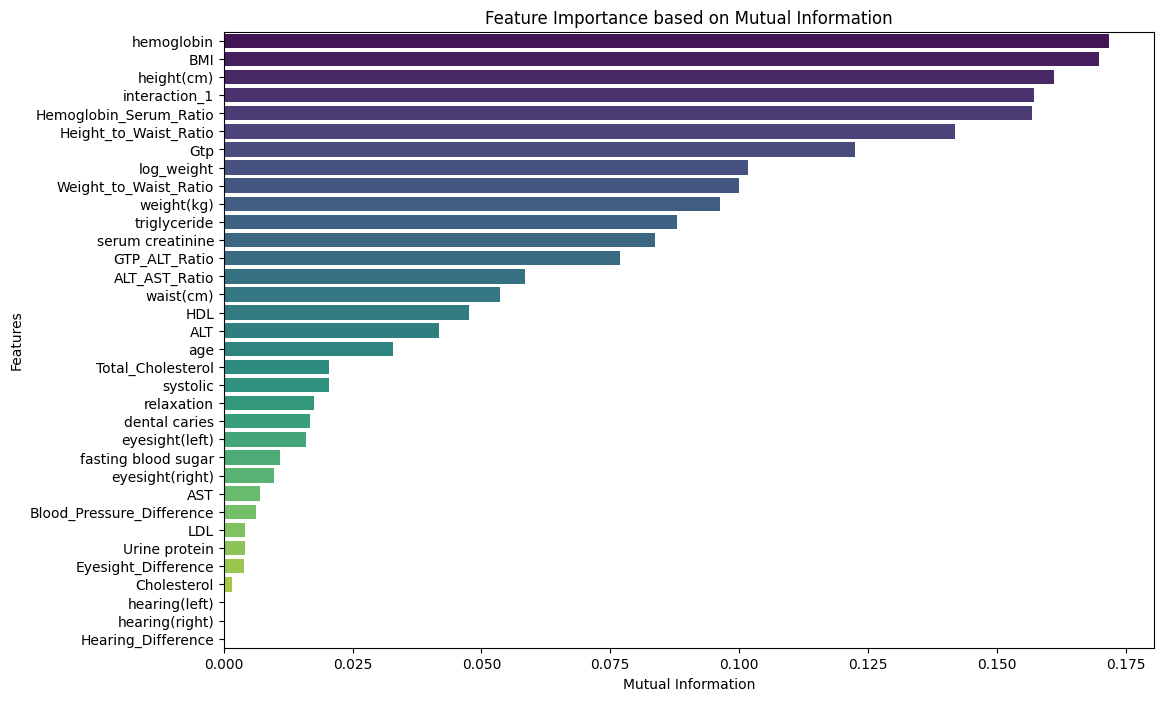

In [17]:
from sklearn.feature_selection import mutual_info_classif

# Mutual Information hisoblash
mi = mutual_info_classif(X, y)

# Xususiyat muhimligini ko'rsatish
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi
}).sort_values(by='Mutual Information', ascending=False)

# Histplot bilan chizish
plt.figure(figsize=(12, 8))
sns.barplot(x='Mutual Information', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance based on Mutual Information')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.show()


In [18]:
import numpy as np
import pandas as pd

def calculate_woe(df, feature, target):
    # Xususiyat bo'yicha guruhlash
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped['bad'] = grouped['sum']  # Maqsad sinf (yoki "bad")
    grouped['good'] = grouped['count'] - grouped['bad']  # Yaxshi sinf (yoki "good")
    
    # Har bir sinfdagi ulushlar
    grouped['bad_rate'] = grouped['bad'] / grouped['bad'].sum()
    grouped['good_rate'] = grouped['good'] / grouped['good'].sum()
    
    # WoE hisoblash
    grouped['WoE'] = np.log(grouped['good_rate'] / grouped['bad_rate'])
    return grouped[['WoE']]

woe_values = calculate_woe(data, 'ALT_AST_Ratio', 'smoking')
print(woe_values)


               WoE
ALT_AST_Ratio     
0.242424       inf
0.280000       inf
0.285714       inf
0.301205      -inf
0.314815      -inf
...            ...
2.736842      -inf
2.760000       inf
2.862069      -inf
2.888889      -inf
2.900000       inf

[774 rows x 1 columns]


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
